In [39]:
import numpy as np
from matplotlib import pyplot as plt


In [40]:
def readGrid(fileName):
    subjectDict = {}

    with open(fileName) as file:
        for line in file:
            node, sub = line.split()
            subjectDict[int(node)] = sub
    return subjectDict

subDict = readGrid("node_info.txt")
print(subDict)

{0: 'sports', 1: 'sports', 2: 'sports', 3: 'sports', 4: 'sports', 5: 'sports', 6: 'sports', 7: 'sports', 8: 'sports', 9: 'sports', 10: 'sports', 11: 'sports', 12: 'sports', 13: 'sports', 14: 'sports', 15: 'sports', 16: 'sports', 17: 'sports', 18: 'sports', 19: 'sports', 20: 'sports', 21: 'sports', 22: 'sports', 23: 'sports', 24: 'sports', 25: 'sports', 26: 'sports', 27: 'sports', 28: 'sports', 29: 'sports', 30: 'politics', 31: 'politics', 32: 'politics', 33: 'politics', 34: 'politics', 35: 'politics', 36: 'politics', 37: 'politics', 38: 'politics', 39: 'politics', 40: 'politics', 41: 'politics', 42: 'politics', 43: 'politics', 44: 'politics', 45: 'politics', 46: 'politics', 47: 'politics', 48: 'politics', 49: 'politics', 50: 'politics', 51: 'politics', 52: 'politics', 53: 'politics', 54: 'politics', 55: 'politics', 56: 'politics', 57: 'politics', 58: 'politics', 59: 'politics', 60: 'politics', 61: 'politics', 62: 'politics', 63: 'politics', 64: 'politics', 65: 'politics', 66: 'politics

In [41]:
def readGraph(fileName, nodes=89):
    graph = np.zeros([89,89])
    
    with open(fileName) as file:
        for line in file:
            node, pointsTo = line.split()
            graph[int(pointsTo), int(node)] = 1 # transpose adjacency
    
    ranks = np.ones([89]).astype(float)
    oldRanks = np.zeros([89]).astype(float)
    count = 0
    while (ranks != oldRanks).all() and count < 1000:
        oldRanks = ranks
        ranks = graph.dot(ranks)
    return ranks

G1 = readGraph("G1.edgelist")
G2 = readGraph("G2.edgelist")
G3 = readGraph("G3.edgelist")

nodesG1 = np.argsort(G1)
nodesG1G2 = np.argsort(G2)
nodesG1G3 = np.argsort(G3)

sportsList = []
politicsList = []
for node in nodesG1:
    if subDict[node] == "sports":
        sportsList.append(node)
    if subDict[node] == "politics":
        politicsList.append(node)
    sportsList = sportsList[:10]
    politicsList = politicsList[:10]
print(sportsList)
print(politicsList)

[6, 4, 7, 27, 12, 29, 21, 22, 17, 15]
[35, 45, 60, 40, 47, 62, 34, 59, 36, 65]


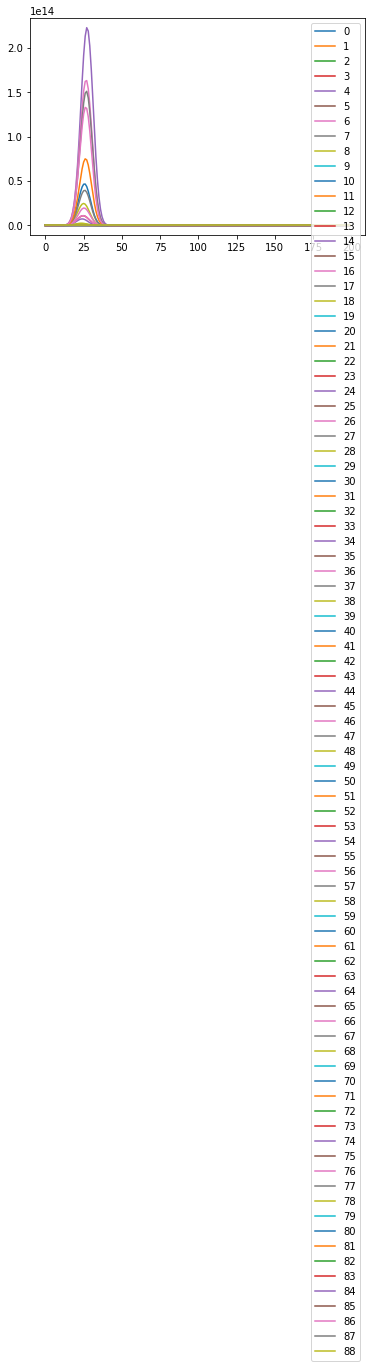

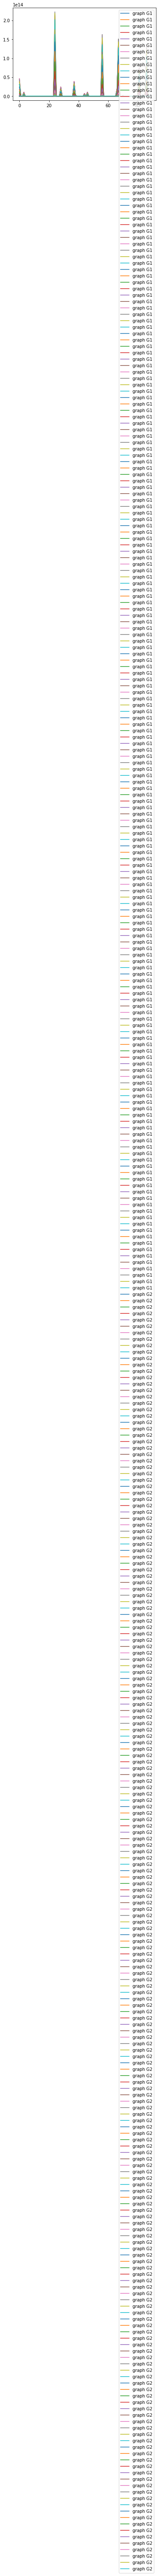

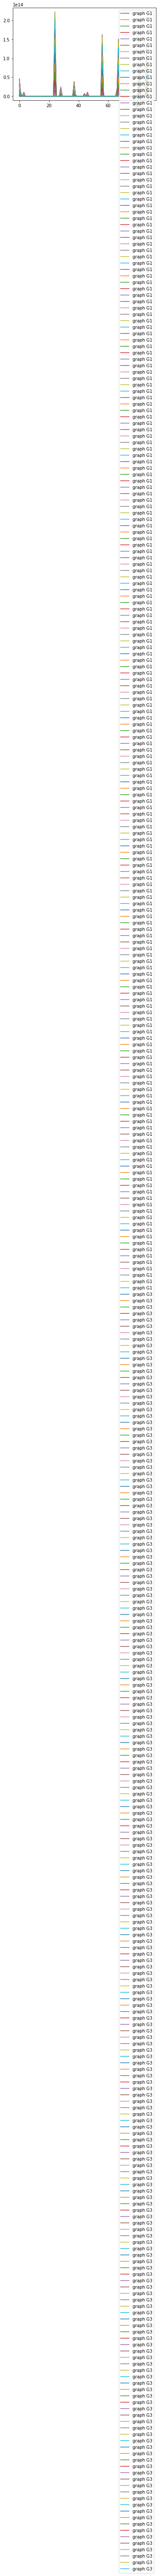

In [51]:
def plot(graph, data):
    size = len(graph)
    for i in range(size):
        plt.plot(data[i], label = "graph " + graph[i])
    plt.legend()
    plt.show()
    
def compareGraph(fileName, subjectNode=None, nodes=89):
    graph = np.zeros([89,89])
    with open(fileName) as file:
        for line in file:
            node, pointsTo = line.split()
            graph[int(pointsTo), int(node)] = 1 # transpose adjacency
    if subjectNode:
        ranks = np.ones([89]).astype(float)
        count = 0
        history = [ranks[subjectNode]]
        for i in range(200):
            ranks = graph.dot(ranks)
            history.append(ranks[subjectNode])
        return history
    else:
        ranks = np.ones([89]).astype(float)
        count = 0
        history=[]
        for i in range(200):
            ranks = graph.dot(ranks)
            history.append(ranks)
        return np.array(history).T
        
G1Trend = compareGraph("G1.edgelist")
count = 0
for elem in G1Trend:
    plt.plot(elem, label=count)
    count+=1
plt.legend()
plt.show()

G1_0 = compareGraph("G1.edgelist", 0)
G2_0 = compareGraph("G2.edgelist", 0)
plot(["G1", "G2"], [G1_0, G2_0])
G1_1 = compareGraph("G1.edgelist", 0)
G3_1 = compareGraph("G3.edgelist", 0)
plot(["G1", "G3"], [G1_1, G3_1])